# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 788


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | huilong
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kiama
Processing Record 11 of Set 1 | nexo
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | warqla
City not found. Skipping...
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | hermanus
Processing Record 23 o

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          728
Lat           728
Lng           728
Max Temp      728
Humidity      728
Cloudiness    728
Wind Speed    728
Country       728
Date          728
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,67.33,72,98,10.54,AU,1675725361
1,alice springs,-23.7000,133.8833,76.55,31,75,6.91,AU,1675725154
2,tuktoyaktuk,69.4541,-133.0374,-40.00,67,75,0.00,CA,1675725386
3,punta arenas,-53.1500,-70.9167,57.31,77,75,11.50,CL,1675725357
4,huilong,31.8111,121.6550,44.92,89,100,9.60,CN,1675725383


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,67.33,72,98,10.54,AU,1675725361
1,alice springs,-23.7000,133.8833,76.55,31,75,6.91,AU,1675725154
2,tuktoyaktuk,69.4541,-133.0374,-40.00,67,75,0.00,CA,1675725386
3,punta arenas,-53.1500,-70.9167,57.31,77,75,11.50,CL,1675725357
4,huilong,31.8111,121.6550,44.92,89,100,9.60,CN,1675725383


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

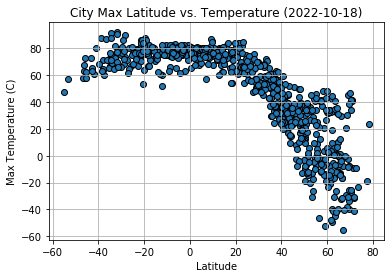

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

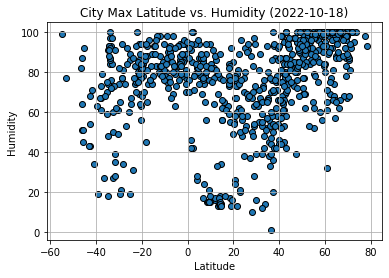

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.grid(True)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

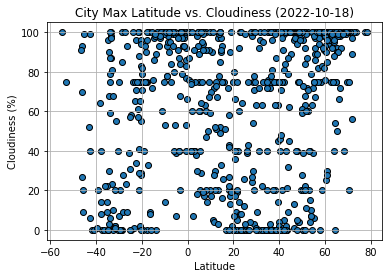

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

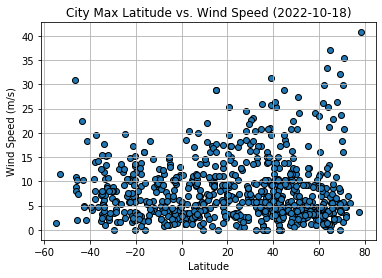

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.grid(True)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x,y):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x,y),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tuktoyaktuk,69.4541,-133.0374,-40.00,67,75,0.00,CA,1675725386
4,huilong,31.8111,121.6550,44.92,89,100,9.60,CN,1675725383
6,qaanaaq,77.4840,-69.3632,-18.62,98,100,3.65,GL,1675725353
7,albany,42.6001,-73.9662,31.73,69,84,1.01,US,1675725412
10,nexo,55.0607,15.1306,33.89,79,6,11.43,DK,1675725569


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,67.33,72,98,10.54,AU,1675725361
1,alice springs,-23.7000,133.8833,76.55,31,75,6.91,AU,1675725154
3,punta arenas,-53.1500,-70.9167,57.31,77,75,11.50,CL,1675725357
5,souillac,-20.5167,57.5167,75.58,94,75,6.91,MU,1675725362
8,ushuaia,-54.8000,-68.3000,47.23,99,100,1.32,AR,1675725154


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7233771638074376


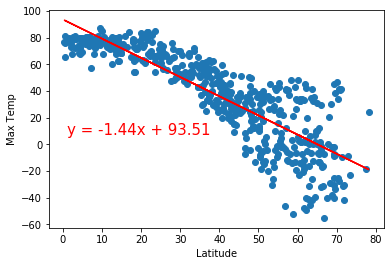

In [47]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], ("Max Temp"), (1), (7))


The r-value is: 0.13358453428879657


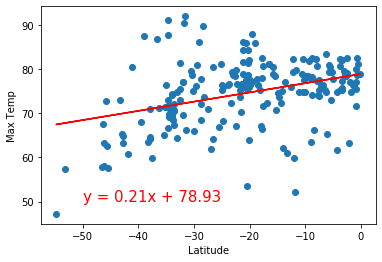

In [48]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], ("Max Temp"), (-50), (50))

**Discussion about the linear relationship:** Two simple linear regressions were used to see if latitude (in the Southern and Northern Hemispheres) predicted max temperature. The relationship between Northern hemisphere latitude coordinates and max temperature is a negative relationship and the two variables are strongly related. This suggests that the closer the latitude coordinates are to zero, the higher the max temperature and the further they are from zero, the lower the max temperature. Latitudes in Northern hemispheres are likely predictive of max temperature. However, we would have to see p-values for this to be conclusive. 

For the Southern hemisphere latitude coordinates and max temperature, these two variables are positively related but the relationship is weak. This finding indicates that max temperature varies in the Southern hemisphere and max temperature is weakly based on Southern hemisphere latitude. However, some temperatures are higher the closer the coordinates get to zero and some temperatures are higher despite being further from zero. Again, we would need to look at p-values to determine if this relationship is statistically significant.   

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20736548237889066


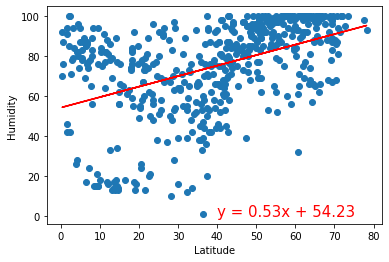

In [51]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], ("Humidity"), (40), (0))

The r-value is: 0.15803036188805641


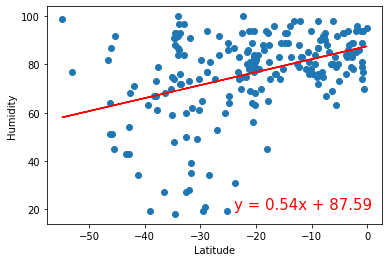

In [55]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], ("Humidity"), (-24), (20))

**Discussion about the linear relationship:** Two simple linear regressions were also used to look at whether Southern and Northern hemisphere latitude coordinates predicted humidity. Humidity and latitude are weakly related in both the Southern and Northern hemispheres. Both relationships are positive but have r-values less than 0.3. This suggests that humidity varies within different latitude coordinates for both the Northern and Southern hemispheres and that latitude is likely not predictive of humidity for these cities. However, we would need to look at the p-values to confirm this. Positive relationships for these variables would suggest that the closer the coordinates to zero, the more humid the area and vice versa. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09151885976625863


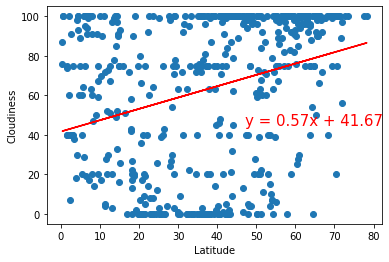

In [59]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], ("Cloudiness"), (47), (45))

The r-value is: 0.1829067411801249


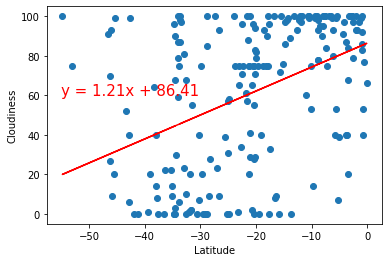

In [62]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], ("Cloudiness"), (-55), (60))


**Discussion about the linear relationship:** Two simple linear regressions were used to look at whether Northen and Southern hemisphere latitude coordinates were predictive of cloudiness. For the Northern hemisphere, latitude coordinates and cloudiness are only weakly positively related. Based on the scatterplot, Northern latitude coordinates are likely not predictive of cloudiness in those areas, however, p-values would be needed to confirm this lack of relationship. For the Southern hemisphere, coordinates and cloudiness are again weakly positively related and coordinates are likely not predictive of cloudiness. However, we would need to look at p-values to confirm this. Positive relationships for these variables would suggest that the closer the latitude coordinates are to zero, the cloudier the area and vice versa. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.0633151472735576e-05


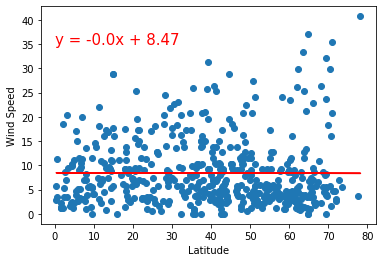

In [64]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], ("Wind Speed"), (0), (35))

The r-value is: 0.024596305390052378


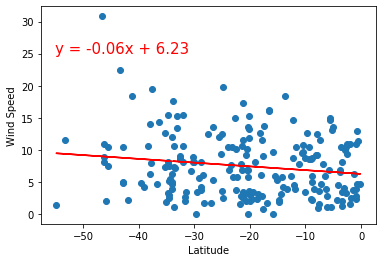

In [67]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], ("Wind Speed"), (-55), (25))

**Discussion about the linear relationship:** Two simple linear regressions were conducted to determine if Southern and Northern hemisphere latitude coordinates were predictive of wind speed. In the Northern hemisphere, wind speed and latitude are very weakly related and the relationship is negative. In the Southern hemisphere, latitude and wind speed are also weakly related and the relationship is negative. Negative relationships indicate that as latitude is closer to zero, wind speed decreases and as latitude is further from zero, the wind speed is higher. Although both of these factors are weakly related, we cannot be sure whether this relationship is statistically significant without p-values. 